### Sales Prediction 
(Simple Linear Regression) 

**Name:** Thaitiel Durán

#### Import Libraries

In [48]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score






#### Import the Dataset

In [49]:
#Install the library needed
! pip install scikit-learn

In [50]:
df = pd.read_csv("advertising.csv")

#### Data Inspection

In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [52]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [53]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Exploratory Data Analysis


##### Outlier Analysis

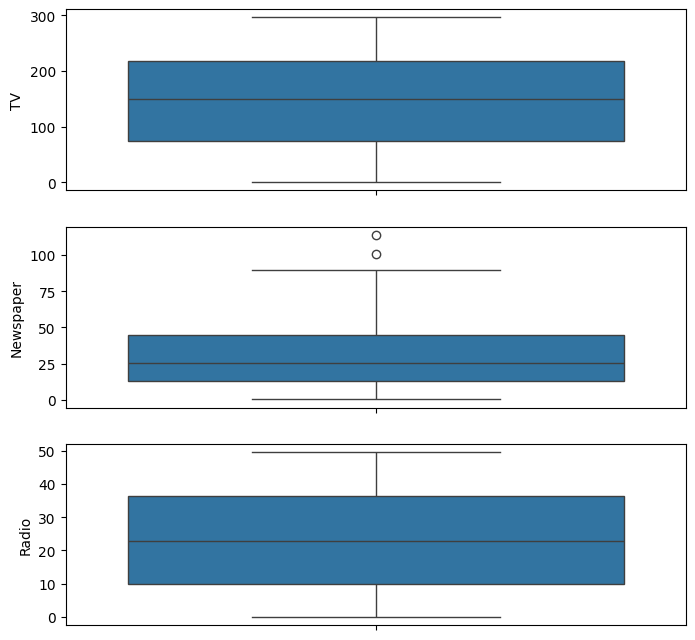

In [54]:
fig, ax = plt.subplots(3, figsize= [8,8])
plt1 = sns.boxplot(df["TV"], ax=ax[0])
plt2 = sns.boxplot(df["Newspaper"], ax=ax[1])
plt3 = sns.boxplot(df["Radio"], ax=ax[2])
plt.show()

<Axes: ylabel='Sales'>

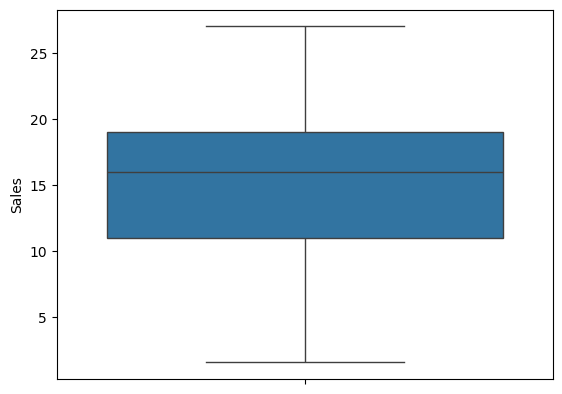

In [68]:

sns.boxplot(df["Sales"])

##### Correlation Analysis

##### Correlation Analysis

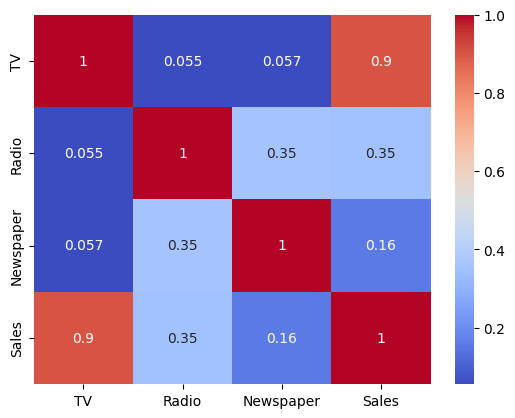

In [56]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()


#### Building the model

##### Separating predictor and target

In [57]:
X = df[["TV"]]
y = df[["Sales"]]

##### Train-Test split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [59]:
X_train.shape

(140, 1)

In [60]:
X_test.shape

(60, 1)

##### Train the model

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

##### Evaluate the model with training data

In [62]:
y_pred = model.predict(X_train)

In [63]:
print("R2 Score: ", r2_score(y_train, y_pred))

R2 Score:  0.8285751917598336


##### Evaluate the model with Test data

In [64]:
y_pred = model.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.7667662916678142


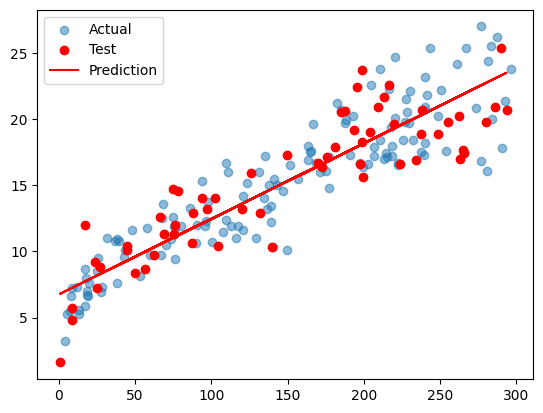

In [67]:
plt.scatter(X_train, y_train, alpha=0.5, label="Actual")
plt.scatter(X_test, y_test, color="red", label="Test")
plt.plot(X_test, y_pred, color="red", label="Prediction")
plt.legend()
plt.show()